In [136]:
import numpy as np
import matplotlib.pyplot  as plt

try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [138]:
with open('un0rick_50v/un0rick.pkl', 'rb') as fp:
    un0rick = pickle.load(fp)

with open('lit3rick_5v/lit3rick.pkl', 'rb') as fp:
    lit3rick = pickle.load(fp)

with open('lit3rick_90V/lit3rick90V_NegativePulse.pkl', 'rb') as fp:
    lit3rick90 = pickle.load(fp)

with open('lit3rick_90V/lit3rick90V_bipolar.pkl', 'rb') as fp:
    lit3rick90b = pickle.load(fp)
    
with open('lit3rick_90V/lit3rick90V_PositivePulse.pkl', 'rb') as fp:
    pos = pickle.load(fp)
with open('lit3rick_90V/lit3rick90V_NegativePulse.pkl', 'rb') as fp:
    neg = pickle.load(fp)
with open('lit3rick_90V/lit3rick90V_pulsewidth.pkl', 'rb') as fp:
    wid = pickle.load(fp)    
    
print(un0rick.keys(),"\n\n",lit3rick.keys())

dict_keys([0, 't', 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 'noise']) 

 dict_keys(['t', (0, 0), (0, 50), (0, 100), (0, 150), (0, 200), (0, 250), (0, 300), (0, 350), (0, 400), (0, 450), (0, 500), (1, 0), (1, 50), (1, 100), (1, 150), (1, 200), (1, 250), (1, 300), (1, 350), (1, 400), (1, 450), (1, 500), 'noise'])


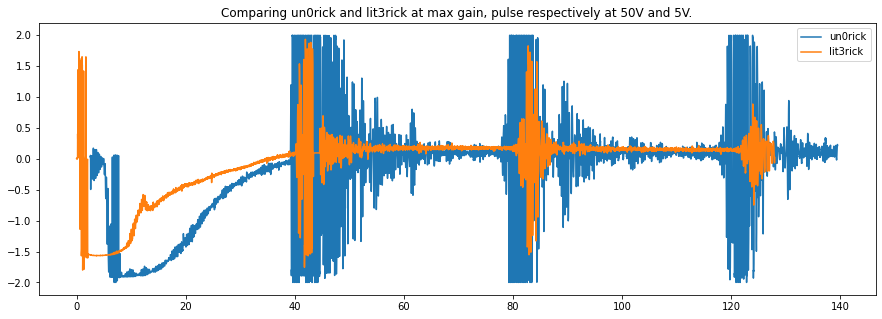

In [64]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[1000],label="un0rick")
plt.plot(lit3rick["t"],lit3rick[(1,500)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at max gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_maxgain.jpg")
plt.show()

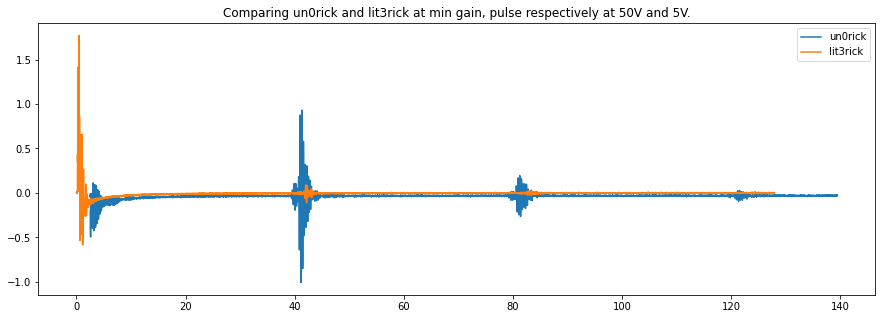

In [65]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[0],label="un0rick")
plt.plot(lit3rick["t"],lit3rick[(1,0)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at min gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_mingain.jpg")
plt.show()

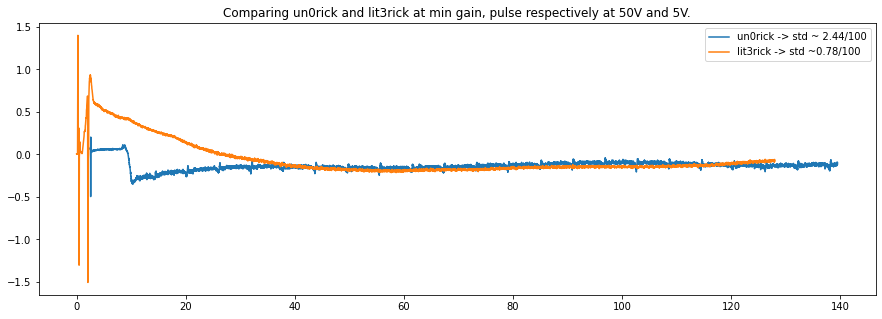

In [66]:
Nu = int(10000*np.std(un0rick["noise"][-100:]))/100
Nl = int(10000*np.std(lit3rick["noise"][-100:]))/100
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick["noise"],label="un0rick -> std ~ "+str(Nu)+"/100")
plt.plot(lit3rick["t"],lit3rick["noise"],label="lit3rick -> std ~"+str(Nl)+"/100")
plt.title("Comparing un0rick and lit3rick at min gain, pulse respectively at 50V and 5V.")
plt.legend()
plt.savefig("compare_noise.jpg")
plt.show()

# Comparing at higher voltages

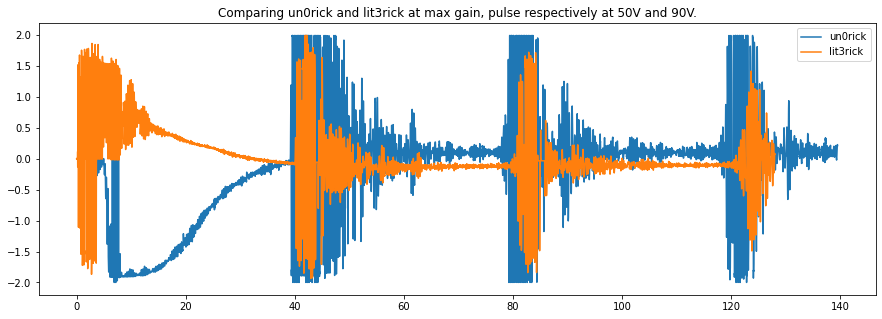

In [67]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[1000],label="un0rick")
plt.plot(lit3rick["t"],lit3rick90[(1,500)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at max gain, pulse respectively at 50V and 90V.")
plt.legend()
plt.savefig("compare_maxgain_90V.jpg")
plt.show()

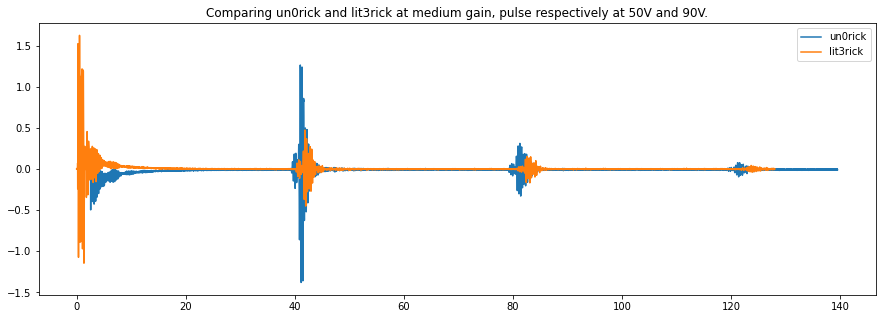

In [133]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[100],label="un0rick")
plt.plot(lit3rick["t"],lit3rick90[(1,100)],label="lit3rick")
plt.title("Comparing un0rick and lit3rick at medium gain, pulse respectively at 50V and 90V.")
plt.legend()
plt.savefig("compare_mediumgain_90V.jpg")
plt.show()

# Comparing positive and negative pulses

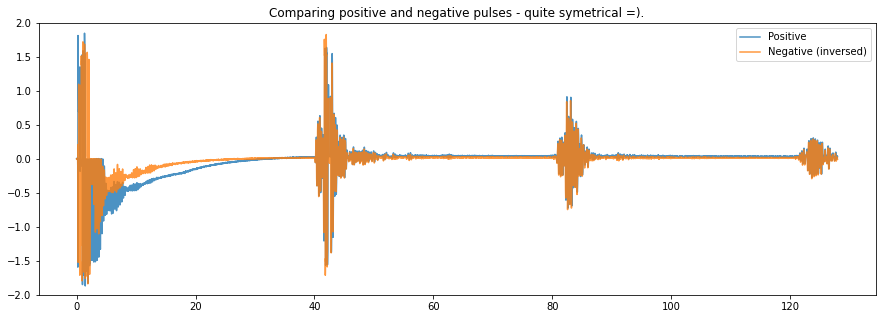

In [103]:
plt.figure(figsize=(15,5))
#plt.plot(neg["t"],pos[(1,300)]+neg[(1,300)],label="Difference",alpha = 0.3)
plt.plot(pos["t"],pos[(1,300)],label="Positive", alpha = 0.8)
plt.plot(neg["t"],-neg[(1,300)],label="Negative (inversed)", alpha = 0.8)
plt.ylim((-2,2))
plt.title("Comparing positive and negative pulses - quite symetrical =).")
plt.legend() 
plt.savefig("lit3rick_pos_neg.jpg")
plt.show()

# Playing with pulse width

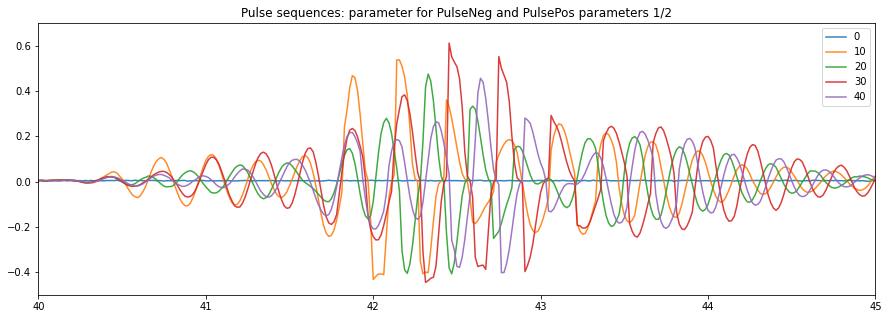

In [104]:
plt.figure(figsize=(15,5))
plt.plot(wid["t"],wid[0],alpha = 0.9,label="0")
plt.plot(wid["t"],wid[10],alpha = 0.9,label="10")
plt.plot(wid["t"],wid[20],alpha = 0.9,label="20")
plt.plot(wid["t"],wid[30],alpha = 0.9,label="30")
plt.plot(wid["t"],wid[40],alpha = 0.9,label="40")

plt.legend() 
plt.xlim((40,45))
plt.ylim((-0.5,0.7))
plt.title("Pulse sequences: parameter for PulseNeg and PulsePos parameters 1/2")
plt.legend() 
plt.savefig("lit3rick_width_1.jpg")
plt.show()


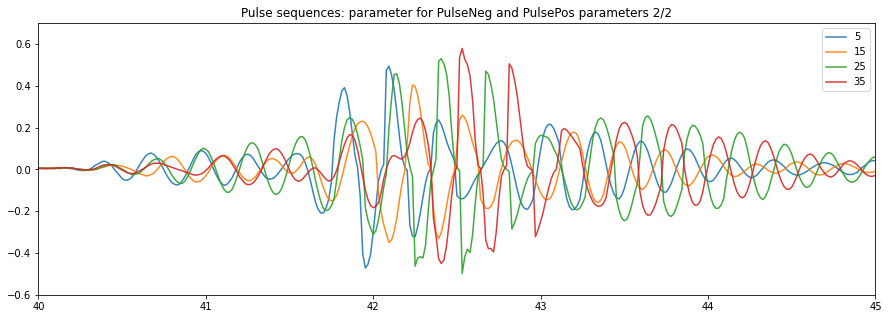

In [105]:
plt.figure(figsize=(15,5))
plt.plot(wid["t"],wid[5],alpha = 0.9,label="5")
plt.plot(wid["t"],wid[15],alpha = 0.9,label="15")
plt.plot(wid["t"],wid[25],alpha = 0.9,label="25")
plt.plot(wid["t"],wid[35],alpha = 0.9,label="35") 
plt.legend() 
plt.title("Pulse sequences: parameter for PulseNeg and PulsePos parameters 2/2")
plt.xlim((40,45))
plt.ylim((-0.6,0.7))
plt.savefig("lit3rick_width_2.jpg")
plt.show()


In [134]:
import imageio

def plotLine(k):
    # Data for plotting
    t = wid["t"]
    s = wid[5]

    fig, ax = plt.subplots(figsize=(10,5)) 
    fig.set_tight_layout(True)
    ax.plot(wid["t"],wid[k],alpha = 0.9,label=str(k));
    ax.plot(lit3rick90["t"],lit3rick90[(0,100)],alpha = 0.9,label="Reference (hilo=0, gain=100)");    
    
    plt.xlim((40,45))
    plt.ylim((-0.6,0.7))

    ax.set(xlabel='us', ylabel="V",
           title='Animation for k ='+str(k))

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(-0.6, 0.7)
    ax.set_xlim(40,45)
  
    # Used to return the plot as an image rray
    fig.canvas.draw();       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8');
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,));

    return image

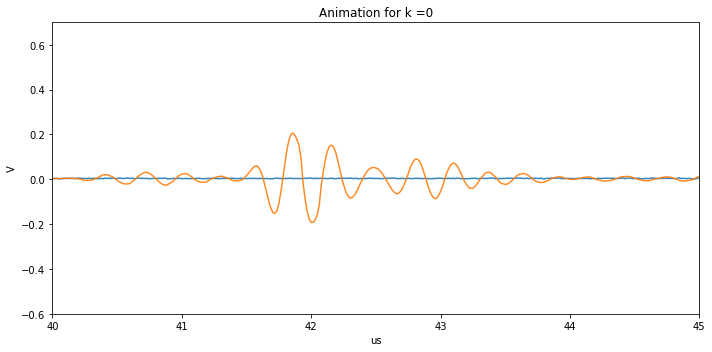

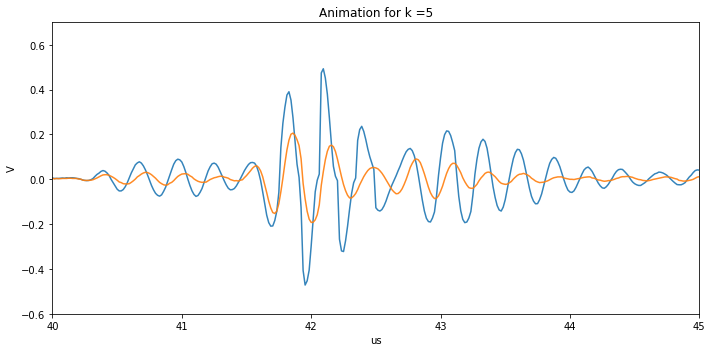

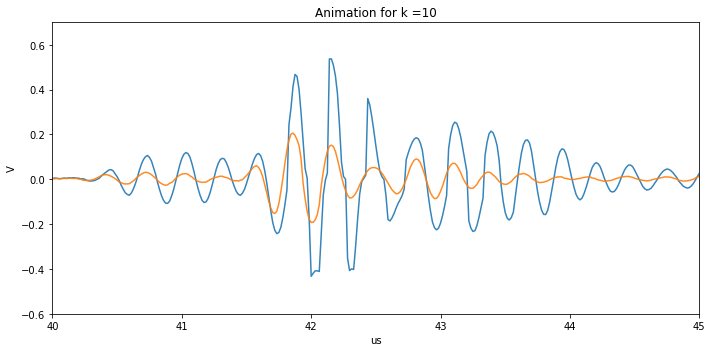

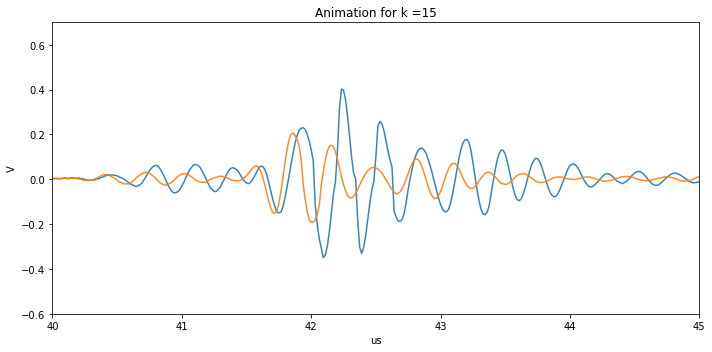

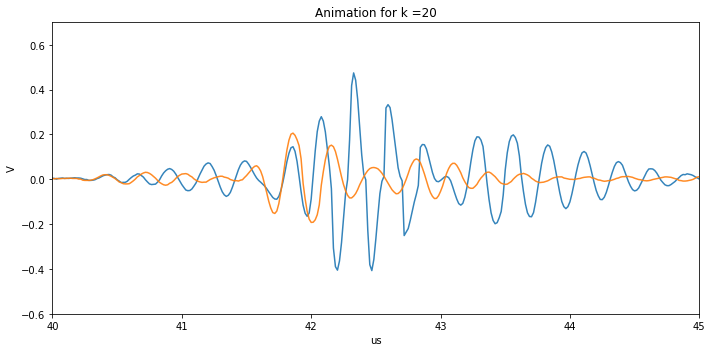

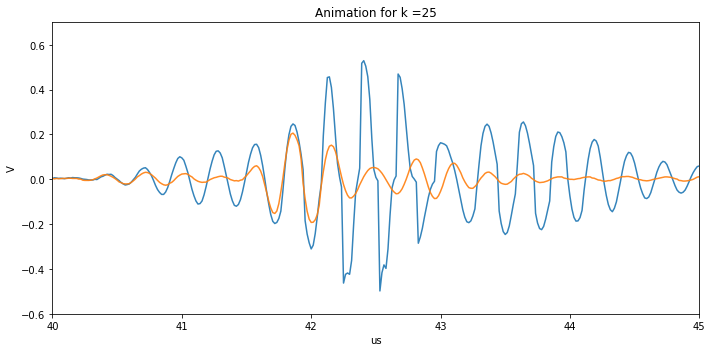

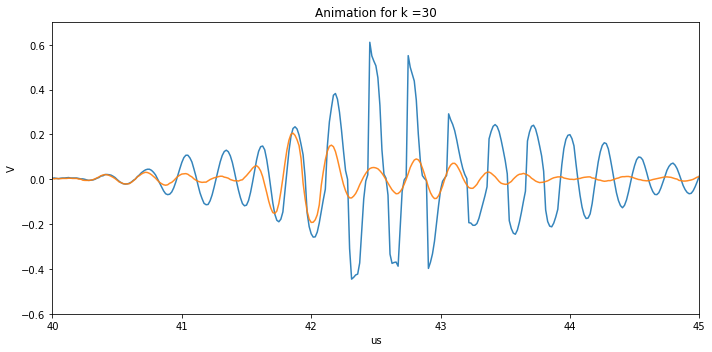

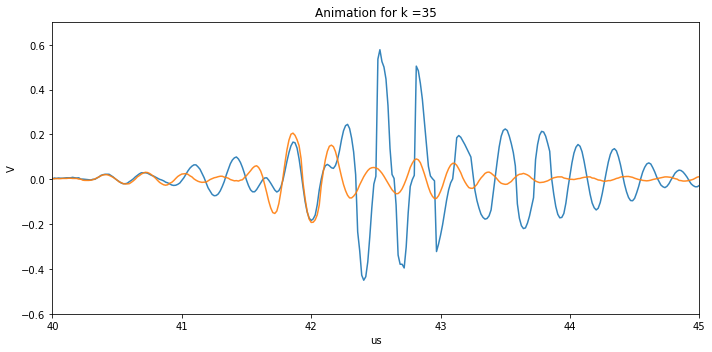

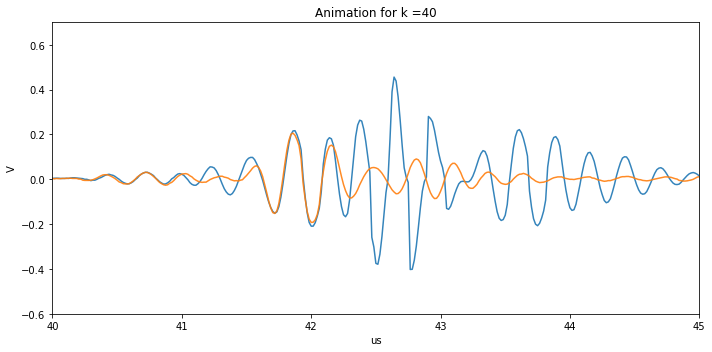

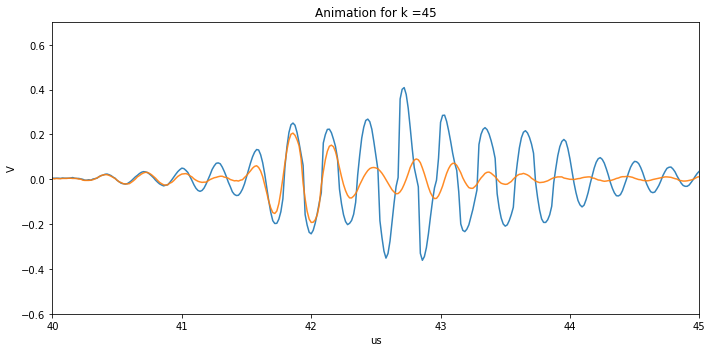

In [135]:
WIDz = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
    
#kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./pulse_width.gif', [plotLine(i) for i in WIDz], fps=1);

# Result of the animation for different pulse widths

![](pulse_width.gif)

# Now comparing with bipolar pulses

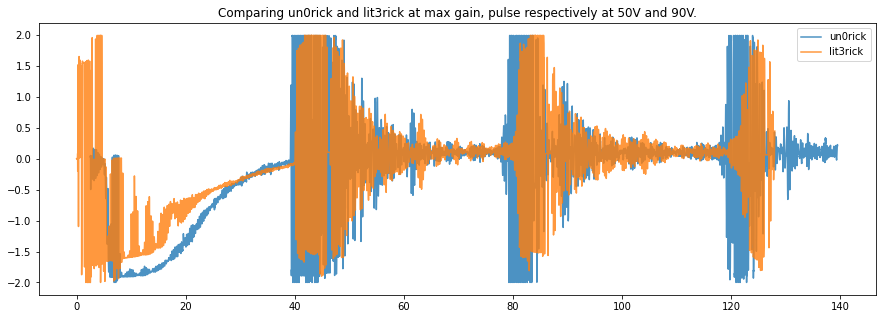

In [144]:
plt.figure(figsize=(15,5))
plt.plot(un0rick["t"],un0rick[1000],label="un0rick",alpha=0.8)
plt.plot(lit3rick90b["t"],lit3rick90b[(1,500)],label="lit3rick",alpha=0.8)
plt.title("Comparing un0rick and lit3rick at max gain, pulse respectively at 50V and 90V.")
plt.legend()
plt.savefig("compare_maxgain_b_90V.jpg")
plt.show()

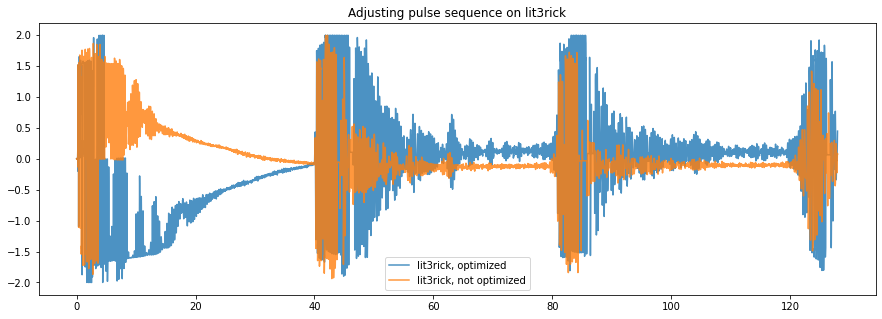

In [146]:
plt.figure(figsize=(15,5))
plt.plot(lit3rick90b["t"],lit3rick90b[(1,500)],label="lit3rick, optimized",alpha=0.8)
plt.plot(lit3rick90["t"],lit3rick90[(1,500)],label="lit3rick, not optimized",alpha=0.8)
plt.title("Adjusting pulse sequence on lit3rick")
plt.legend()
plt.savefig("pulse_seq.jpg")
plt.show()